# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

**Задача. Откройте файл с данными и изучите общую информацию**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #чтение файла/datasets/data.csv

In [2]:
data.info() #оценка объема данных в представленной таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data['locality_name'].value_counts()

Санкт-Петербург       15721
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
деревня Кисельня          1
поселок Семиозерье        1
поселок Коммунары         1
деревня Тойворово         1
деревня Пустынка          1
Name: locality_name, Length: 364, dtype: int64

In [6]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Выявлю пропущенные значения одновременно в locality_name и cityCenters_nearest

In [7]:
data[data['locality_name'].isna() & data['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.3,2,NaN,...,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.7,4.0,29.0,3,NaN,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,NaN,9.0,30.5,2,False,...,29.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,NaN,9.0,36.6,2,False,...,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.6,16.0,16.0,7,False,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


Выявлю крайние значения в стоимости квартиры

In [8]:
print('Максимальная цена квартиры', data['last_price'].max())
print('Минимальная цена квартиры', data['last_price'].min())

Максимальная цена квартиры 763000000.0
Минимальная цена квартиры 12190.0


In [9]:
data.sort_values(by='last_price').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


In [10]:
print('Максимальная площадь квартиры', data['total_area'].max())

Максимальная площадь квартиры 900.0


In [11]:
data.sort_values(by='total_area', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.9,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


In [12]:
print('Максимальное количество комнат', data['rooms'].max())

Максимальное количество комнат 19


In [13]:
data.sort_values(by='rooms', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,NaN,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
20829,6,28659000.0,245.4,2016-03-31T00:00:00,14,NaN,4.0,168.3,2,NaN,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0


In [14]:
print('Максимальная высота потолка', data['ceiling_height'].max())

Максимальная высота потолка 100.0


In [15]:
data.sort_values(by='ceiling_height', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0


In [16]:
print('Максимальное расстояние до аэропорта', data['airports_nearest'].max())

Максимальное расстояние до аэропорта 84869.0


In [17]:
print('Максимальное расстояние до центра', data['cityCenters_nearest'].max())

Максимальное расстояние до центра 65968.0


In [18]:
print('Максимальное количество дней до снятия', data['days_exposition'].max())

Максимальное количество дней до снятия 1580.0


In [19]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [21]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [22]:
data.duplicated().sum()

0

### Вывод - изучение данных

В таблице 22 столбцов. Тип данных: dtypes: bool(2), float64(14), int64(3), object(3)

1. Типы поселений чередуются "е" и "ё" - поселок, посёлок
<br>

2. Тип данных dtypes float64, которые в целых значениях не влияют на результаты исследования или значения имеют количественные измерения, можно заменить на int:
<br>- last_price - цена квартиры,
<br>- floors_total - всего этажей, 
<br>- balcony - количество балконов,
<br>- airports_nearest - расстояние до ближайшего аэропорта в метрах (м),
<br>- cityCenters_nearest - расстояние до центра города (м),
<br>- parks_around3000 - число парков в радиусе 3 км,
<br>- parks_nearest - расстояние до ближайшего парка (м),
<br>- ponds_around3000 - число водоёмов в радиусе 3 км,
<br>- ponds_nearest - расстояние до ближайшего водоёма (м),
<br>- days_exposition  - сколько дней было размещено объявление (от публикации до снятия).
<br>

3. Тип недвижимости и тип данных, связанный с ним:
<br>- is_apartment(50) - апартаменты. С точки зрения законодательства не является полноценным жильём. Цены на апартаменты, как правило, ниже чем на жилую недвижимость, потому могут занижать усреднённые показатели. Удалять не буду. Тип данных заменю на int, где 0 - нет, 1 - да.
<br>- studio(149) - квартира-студия. Тип данных заменю на int, где 0 - нет, 1 - да. 
<br>

4. Есть множество пропусков, природу которых необходимо изучить:
<br>- ceiling_height(9195) - высота потолков, пропущенные значения заменять усреднёнными или иными значениями имеет смысл в том случае, если будет обнаружена взаимосвязь с другими значениями таблицы.
<br>- floors_total(86) - всего этажей в доме, подходящих значений для замены нет.
<br>- living_area(1903) - жилая площадь в квадратных метрах (м²), пропущенные значения заменять усреднёнными или иными значениями имеет смысл в том случае, если будет обнаружена взаимосвязь с другими значениями таблицы. Иначе, оставлю как есть.
<br>- is_apartment(20924) - апартаменты, булев тип, заполнять пропуски не имеет смысла.
<br>- kitchen_area(2278) - площадь кухни в квадратных метрах (м²), пропущенные значения заменять усреднёнными или приписать к квартире-студио имеет смысл в том случае, если будет обнаружена взаимосвязь с другими значениями таблицы. 
<br>- balcony(11519) - пропущенные значения заменю на ноль, скорее всего балкона действительно нет
<br>- locality_name(49) - название населённого пункта, если отсутствует расстояние до центра, удалю, остальное переименую в зависимости от расстояния от центра и аэропорта.
<br>- airports_nearest(5542) - расстояние до ближайшего аэропорта в метрах(м), пропуски заменю средними во взаимосвязи с другими показателями. 
<br>- cityCenters_nearest(5519) - расстояние до центра города (м), пропуски заменю средними во взаимосвязи с другими показателями.
<br>- parks_around3000(5518) - число парков в радиусе 3 км. В Питере можно заменить на усредненные значения, а в малых населенных пунктах можно указывать равным 1. Живут на природе, лес или поле за околицей, это тоже парк, только в натуральном виде. 
<br>- parks_nearest(15620) - расстояние до ближайшего парка(м), пропуски не подтверждены с числом парков в радиусе 3 км, потому можно заполнить усреднёнными значениями во взаимосвязи с числом парков.
<br>- ponds_around3000(5518) - число водоёмов в радиусе 3 км, в Питере, куда ни глянь, всюду водоёмы, потому можно смело заменять на усредненные значения.
<br>- ponds_nearest(14589) - расстояние до ближайшего водоёма(м), и здесь можно смело пропуски заменить на усредненные значения.
<br>- days_exposition(3181) - сколько дней было размещено объявление (от публикации до снятия), Пропусков много, удаление повлияет на результат, потому буду принимать решение по результатам исследования.  
<br>

5. Артефакты и прочие отклонения можно отсечь на этапе предобработки данных, но сделаю это позже, на этапе исследования:
<br>- Стоимость квартиры в 12190 руб, 
<br>- Высота потолка в 100 метров
<br>- Максимальное количество дней до снятия 1580, меня не удивляет, я сам продавал участок земли в течении 5 лет. 
<br>

6. Единицы измерения:
<br>- airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - значения приведены в метрах, нам привычнее измерять в км
<br>

7. Тип данных object:
<br>- first_day_exposition - дата публикации, необходимо заменить в формат datetime

## Предобработка данных

**Задача**
<br>
1. Определите и изучите пропущенные значения
2. Приведите данные к нужным типам

### floors_total - всего этажей в доме

In [23]:
print('Количество пропущенных значений в столбце floors_total:', data['floors_total'].isna().sum())

Количество пропущенных значений в столбце floors_total: 86


floors_total(86) - всего этажей в доме, 
<br>подходящих значений для замены нет, так же как нет какой-либо логики для заполнения. Если заполнять какими-либо средними, то может получиться ситуация, когда: floor > floors_total, что совсем недопустимо. Пропущенных значений всего 86 из 23699, что составляет 0.36% от общей выборки. В этом случае от лишних сущностей надо избавляться, потому принимаю решение удалить эти значения.

In [24]:
data[data['floors_total'].isna()].sort_values(by='floor')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
15989,1,4100000.0,74.50,2017-04-22T00:00:00,3,NaN,NaN,NaN,1,NaN,...,NaN,0.0,Красное Село,25382.0,28806.0,0.0,NaN,0.0,NaN,72.0
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,NaN,NaN,NaN,1,NaN,...,NaN,0.0,посёлок Щеглово,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0
20250,5,6060000.0,60.60,2015-10-29T00:00:00,2,2.80,NaN,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,35231.0,13301.0,0.0,NaN,1.0,830.0,1257.0
9979,3,4100000.0,35.00,2016-09-27T00:00:00,1,NaN,NaN,NaN,2,NaN,...,NaN,0.0,Санкт-Петербург,43685.0,9234.0,0.0,NaN,0.0,NaN,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,19,13500000.0,77.80,2019-04-17T00:00:00,2,2.80,NaN,39.41,21,NaN,...,13.27,2.0,Санкт-Петербург,12838.0,11477.0,1.0,593.0,1.0,130.0,NaN
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
14264,13,14000000.0,94.00,2019-01-23T00:00:00,6,2.65,NaN,51.00,23,NaN,...,16.30,NaN,Санкт-Петербург,51333.0,13056.0,0.0,NaN,0.0,NaN,NaN
6030,3,10900000.0,116.23,2017-05-05T00:00:00,4,NaN,NaN,NaN,24,NaN,...,NaN,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,83.0


In [25]:
data.dropna(subset = ['floors_total'], inplace=True)

In [26]:
print('Количество пропущенных значений в столбце floors_total:', data['floors_total'].isna().sum())

Количество пропущенных значений в столбце floors_total: 0


### locality_name - название населённого пункта

In [27]:
print('Количество пропущенных значений в столбце locality_name:',data['locality_name'].isna().sum())

Количество пропущенных значений в столбце locality_name: 48


Приведу типы поселений к единному значению, только наименование, без указания типа поселения, оставлю только СНТ:

In [28]:
name_loc = ['поселок ', 'городского типа ', 'при железнодорожной станции ', 'станции ', 'деревня ', 'село ', 
            'городской ', 'коттеджный ', 'имени ', 'посёлок ']

for name in name_loc:
    data['locality_name'] = data['locality_name'].str.replace(name, '')

In [29]:
name_snt = ['садоводческое некоммерческое товарищество', 'садовое товарищество']
for name in name_snt:
    data['locality_name'] = data['locality_name'].str.replace(name, 'СНТ')    

In [30]:
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [31]:
#data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
#data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа ', '')
#data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции ', '')
#data['locality_name'] = data['locality_name'].str.replace('городской посёлок ', '')
#data['locality_name'] = data['locality_name'].str.replace('коттеджный посёлок ', '')
#data['locality_name'] = data['locality_name'].str.replace('посёлок станции ', '')
#data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
#data['locality_name'] = data['locality_name'].str.replace('село ', '')
#data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'СНТ')
#data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'СНТ')
#data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')

In [32]:
data['locality_name'].value_counts()

Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
                   ...  
Снегирёвка             1
СНТ Рахья              1
Большое Рейзино        1
Кондратьево            1
Большой Сабск          1
Name: locality_name, Length: 307, dtype: int64

Удалю строки, где locality_name - название населённого пункта и cityCenters_nearest - расстояние до центра отсутствуют. Такие данные не восполнимы и однозначно не пригодны для исследования. 

In [33]:
data = data[(~data['locality_name'].isna()) | (~data['cityCenters_nearest'].isna())]

In [34]:
print('Количество пропущенных значений в столбце locality_name:',data['locality_name'].isna().sum())

Количество пропущенных значений в столбце locality_name: 40


Заменю пропущенные значения в locality_name на: если расстояние до центра меньше 17км - Санкт-Петербург, если расстояние до аэропорта меньше 4км - Рощино, остальное - noname

In [35]:
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] < 17000), 'locality_name'] = "Санкт-Петербург"

In [36]:
print('Количество пропущенных значений в столбце locality_name:',data['locality_name'].isna().sum())

Количество пропущенных значений в столбце locality_name: 11


In [37]:
data.loc[(data['locality_name'].isna()) & (data['airports_nearest'] < 4000), 'locality_name'] = "Рощино"

In [38]:
print('Количество пропущенных значений в столбце locality_name:',data['locality_name'].isna().sum())

Количество пропущенных значений в столбце locality_name: 11


In [39]:
data['locality_name'] = data['locality_name'].fillna('noname')

In [40]:
print('Количество пропущенных значений в столбце locality_name:',data['locality_name'].isna().sum())

Количество пропущенных значений в столбце locality_name: 0


### balcony - число балконов

In [41]:
print('Количество пропущенных значений в столбце balcony:', data['balcony'].isna().sum())

Количество пропущенных значений в столбце balcony: 11476


balcony(11519) - пропущенные значения заменю на ноль, скорее всего балкона действительно нет

In [42]:
data['balcony'] = data['balcony'].fillna(0)

In [43]:
print('Количество пропущенных значений в столбце balcony:', data['balcony'].isna().sum())

Количество пропущенных значений в столбце balcony: 0


### is_apartment - апартаменты 

In [44]:
print('Количество пропущенных значений в столбце is_apartment:', data['is_apartment'].isna().sum())

Количество пропущенных значений в столбце is_apartment: 20835


is_apartment(50) - апартаменты. Тип данных заменю на int, где 0 - нет, 1 - да.


In [45]:
data.loc[data['is_apartment'] ==True, 'is_apartment'] = 1
data.loc[data['is_apartment'] ==False, 'is_apartment'] = 0
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'].value_counts()

0    23555
1       50
Name: is_apartment, dtype: int64

In [46]:
print('Количество пропущенных значений в столбце is_apartment:', data['is_apartment'].isna().sum())

Количество пропущенных значений в столбце is_apartment: 0


### studio - квартира-студия 

In [47]:
print('Количество пропущенных значений в столбце studio:', data['studio'].isnull().sum())

Количество пропущенных значений в столбце studio: 0


studio(149) - квартира-студия. Тип данных заменю на int, где 0 - нет, 1 - да.

In [48]:
data.loc[data['studio'] ==True, 'studio'] = 1
data.loc[data['studio'] ==False, 'studio'] = 0
data['studio'] = data['studio'].fillna(0)
data['studio'].value_counts()

0    23459
1      146
Name: studio, dtype: int64

In [49]:
print('Количество пропущенных значений в столбце studio:', data['studio'].isnull().sum())

Количество пропущенных значений в столбце studio: 0


### Общая функция

Нашёл в интернете классную функцию, написанную безымянным программистом, которая облегчила мне мой труд. 
Общая функция, с помощью которой буду заполнять пропуски по медианным значениям:

In [50]:
def func_propuski_median(row, pivot_table, aim_column, index_columns):
    if pd.isna(row[aim_column]):
        index = (index_columns[0], index_columns[1])
        if index in pivot_table.index:
            return pivot_table.loc[index][0]
        else:
            return data[aim_column].median()
    else:
        return row[aim_column]

Общая функция, с помощью которой буду заполнять пропуски по среднеарифметическим значениям:

In [51]:
def func_propuski_mean(row, pivot_table, aim_column, index_columns):
    if pd.isna(row[aim_column]):
        index = (index_columns[0], index_columns[1])
        if index in pivot_table.index:
            return pivot_table.loc[index][0]
        else:
            return data[aim_column].mean()
    else:
        return row[aim_column]

### kitchen_area - площадь кухни 

Категоризирую данные из total_area по общей площади и возьму медиану kitchen_area по total_area.
Приму следующую градацию:
< 50(м2) - малая
50 - 100(м2) - средняя
100 - 150(м2) - большая
150<(м2)  - огромная

In [52]:
print('Количество пропущенных значений в столбце kitchen_area:', data['kitchen_area'].isna().sum())

Количество пропущенных значений в столбце kitchen_area: 2229


kitchen_area(2278) - площадь кухни в квадратных метрах (м²), пропущенные значения заменять усреднёнными или приписать к квартире-студио имеет смысл в том случае, если будет обнаружена взаимосвязь с другими значениями таблицы.

In [53]:
data['kitchen_area'].isna().sum()

2229

In [54]:
data[(data['kitchen_area'].isna())]['studio'].sum()

146

Все студио, как и ожидалось, имеют площадь кухни = 0, потому пропущенные значения площади кухни у студио-квартир заменю на ноль.

In [55]:
data.loc[(data["kitchen_area"].isna()) & (data["studio"]==1), 'kitchen_area'] = 0

In [56]:
data[(data['kitchen_area'].isna()) & (data['rooms']==9)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8860,12,17000000.0,235.0,2018-07-14T00:00:00,9,3.0,6.0,NaN,3,0,...,NaN,0.0,Санкт-Петербург,24466.0,5034.0,1.0,346.0,0.0,NaN,90.0


Но есть и 9-комнатные квартиры без указания площади кухни, потому посмотрю корреляцию между площадью кухни и total_area и rooms

In [57]:
data['kitchen_area'].corr(data['total_area'])

0.6123917121290909

In [58]:
data['kitchen_area'].corr(data['rooms'])

0.28621085691699344

Наблюдается хорошая корреляция с total_area и незначительная с rooms.

Категоризирую данные из total_area по общей площади и возьму среднеарифметическую kitchen_area по total_area.
Приму следующую градацию:
< 50(м2) - малая
50 - 100(м2) - средняя
100 - 150(м2) - большая
150<(м2)  - огромная

In [59]:
def m_total_area(row):
    if row['total_area'] < 50:
        return 'малая'
    elif row['total_area'] < 100:
        return 'средняя'
    elif row['total_area'] < 150:
        return 'большая'
    elif row['total_area'] >= 150:
        return 'огромная'

In [60]:
data['total_area_cat'] = data.apply(m_total_area, axis=1)

In [61]:
data[['total_area', 'kitchen_area', 'total_area_cat']].head(10)

,total_area,kitchen_area,total_area_cat
0,108.00,25.00,большая
1,40.40,11.00,малая
2,56.00,8.30,средняя
3,159.00,NaN,огромная
4,100.00,41.00,большая
5,30.40,9.10,малая
6,37.30,14.40,малая
7,71.60,18.90,средняя
8,33.16,8.81,малая
9,61.00,6.50,средняя


In [62]:
data.groupby('total_area_cat')['kitchen_area'].mean().sort_values(ascending=False).to_frame()

,kitchen_area
total_area_cat,
огромная,25.800840
большая,18.351604
средняя,10.803814
малая,8.403255


И здесь видим хорошую корреляцию.

In [63]:
data['kitchen_area'] = data.groupby('total_area_cat')['kitchen_area'].apply(lambda x: x.fillna(x.mean()))

In [64]:
print('Количество пропущенных значений в столбце kitchen_area:', data['kitchen_area'].isna().sum())

Количество пропущенных значений в столбце kitchen_area: 0


### cityCenters_nearest - расстояние до центра города 

In [65]:
print('Количество пропущенных значений в столбце cityCenters_nearest:',data['cityCenters_nearest'].isna().sum())

Количество пропущенных значений в столбце cityCenters_nearest: 5501


Заполню пропуски в cityCenters_nearest - расстояние до центра города, в зависимости от расстояния населенного пункта до центра Питера.

In [66]:
cityCenters_nearest_pt = data.pivot_table(index = 'locality_name', values = 'cityCenters_nearest')

In [67]:
data['cityCenters_nearest'] = data.apply(func_propuski_mean,
                                        pivot_table = cityCenters_nearest_pt,
                                        aim_column = 'cityCenters_nearest',
                                        index_columns = 'locality_name',
                                        axis = 1)

In [68]:
print('Количество пропущенных значений в столбце cityCenters_nearest:',data['cityCenters_nearest'].isna().sum())

Количество пропущенных значений в столбце cityCenters_nearest: 0


### ceiling_height - высота потолков

In [69]:
print('Количество пропущенных значений в столбце ceiling_height:',data['ceiling_height'].isna().sum())

Количество пропущенных значений в столбце ceiling_height: 9112


ceiling_height(9195) - высота потолков, пропущенные значения заменять усреднёнными или иными значениями имеет смысл в том случае, если будет обнаружена взаимосвязь с другими значениями таблицы.

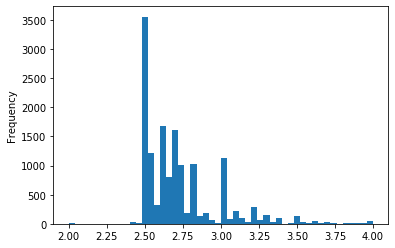

In [70]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 50, range=(2,4))
plt.show()

In [71]:
data['ceiling_height'].corr(data['last_price'])

0.08543100714583711

Гистограмма показывает, что высота потолков в основном варируются в пределах 2.5-3.1(м). Корреляция высоты потолка со стоимостью квартиры практически отсутствуют, потому заполню средним по удаленности от центра. Как известно, в центре Питера, дома в основном дореволюционной постройки, с высокими потолками.

Категоризирую данные из cityCenters_nearest по удаленности от центра и возьму среднее по высоте потолков, чтоб заполнить пропуски в ceiling_height.
<br>Приму следующую градацию:
<br> 0-3(км)  - центр
<br> 3-17(км) - город
<br> 17< (км) - область     

In [72]:
def m_ceiling_height(row):
    if row['cityCenters_nearest'] < 3000:
        return 'центр'
    elif row['cityCenters_nearest'] < 17000:
        return 'город'
    elif row['cityCenters_nearest'] >= 17000:
        return 'область'

In [73]:
data['do_centra_cat'] = data.apply(m_ceiling_height, axis=1)

In [74]:
data[['locality_name', 'cityCenters_nearest', 'do_centra_cat']].head(10)

,locality_name,cityCenters_nearest,do_centra_cat
0,Санкт-Петербург,16028.000000,город
1,Шушары,18603.000000,область
2,Санкт-Петербург,13933.000000,город
3,Санкт-Петербург,6800.000000,город
4,Санкт-Петербург,8098.000000,город
5,Янино-1,14185.084015,город
6,Парголово,19143.000000,область
7,Санкт-Петербург,11634.000000,город
8,Мурино,14185.084015,город
9,Санкт-Петербург,15008.000000,город


Среднее по категориям составит:

In [75]:
data.groupby('do_centra_cat')['ceiling_height'].mean().sort_values(ascending=False).to_frame()

,ceiling_height
do_centra_cat,
центр,3.233929
город,2.771542
область,2.677288


Обнаруживается связь высоты потолка от расположения.

In [76]:
data['ceiling_height'] = data.groupby('do_centra_cat')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))

In [77]:
print('Количество пропущенных значений в столбце ceiling_height:',data['ceiling_height'].isna().sum())

Количество пропущенных значений в столбце ceiling_height: 0


### airports_nearest - расстояние до ближайшего аэропорта 

airports_nearest — расстояние до ближайшего аэропорта. При помощи общей функции и уже проведенной категоризации, заполню пропущенные данные среднеарифметическими,  в зависимости от наименования населенного пункта и расстояния до центра. 

In [78]:
print('Количество пропущенных значений в столбце airports_nearest:',data['airports_nearest'].isna().sum())

Количество пропущенных значений в столбце airports_nearest: 5524


In [79]:
airports_nearest_pt = data.pivot_table(index = ['locality_name','do_centra_cat'], values = "airports_nearest")

In [80]:
data['airports_nearest'] = data.apply(func_propuski_mean,
                                        pivot_table = airports_nearest_pt,
                                        aim_column = 'airports_nearest',
                                        index_columns = ['locality_name','do_centra_cat'],
                                        axis = 1)


In [81]:
print('Количество пропущенных значений в столбце airports_nearest:',data['airports_nearest'].isna().sum())

Количество пропущенных значений в столбце airports_nearest: 0


### living_area - жилая площадь

In [82]:
print('Количество пропущенных значений в столбце living_area:', data['living_area'].isna().sum())

Количество пропущенных значений в столбце living_area: 1869


Здесь по аналогии с kitchen_area посмотрю корреляцию с total_area:

In [83]:
data['living_area'].corr(data['total_area'])

0.9397905059559237

Корреляция отличная. Заменяю тем же способом, что и с kitchen_area. Категоризация уже произведена в total_area_cat

In [84]:
data.groupby('total_area_cat')['living_area'].mean().sort_values(ascending=False).to_frame()

,living_area
total_area_cat,
огромная,124.321546
большая,68.226769
средняя,39.687087
малая,20.684955


In [85]:
data['living_area'] = data.groupby('total_area_cat')['living_area'].apply(lambda x: x.fillna(x.mean()))

In [86]:
print('Количество пропущенных значений в столбце living_area:', data['living_area'].isna().sum())

Количество пропущенных значений в столбце living_area: 0


### parks_around3000 - число парков 

In [87]:
print('Количество пропущенных значений в столбце parks_around3000:', data['parks_around3000'].isna().sum())

Количество пропущенных значений в столбце parks_around3000: 5500


Заполню пропущенные значения при помощи общей функции по медиане, в зависимости от наименования, населённого пункта и расстояния до центра.

In [88]:
parks_around3000_pt = data.pivot_table(index = ['locality_name','do_centra_cat'], values = "parks_around3000")

In [89]:
data['parks_around3000'] = data.apply(func_propuski_median,
                                        pivot_table = airports_nearest_pt,
                                        aim_column = 'parks_around3000',
                                        index_columns = ['locality_name','do_centra_cat'],
                                        axis = 1)

In [90]:
print('Количество пропущенных значений в столбце parks_around3000:', data['parks_around3000'].isna().sum())

Количество пропущенных значений в столбце parks_around3000: 0


### parks_nearest - расстояние до ближайшего парка 

In [91]:
print('Количество пропущенных значений в столбце parks_nearest:', data['parks_nearest'].isna().sum())

Количество пропущенных значений в столбце parks_nearest: 15560


Заполню пропущенные значения при помощи общей функции среднеарифметическими, в зависимости от наименования, населённого пункта и расстояния до центра.

In [92]:
parks_nearest_pt = data.pivot_table(index = ['locality_name','do_centra_cat'], values = "parks_nearest")

In [93]:
data['parks_nearest'] = data.apply(func_propuski_mean,
                                        pivot_table = airports_nearest_pt,
                                        aim_column = 'parks_nearest',
                                        index_columns = ['locality_name','do_centra_cat'],
                                        axis = 1)

In [94]:
print('Количество пропущенных значений в столбце parks_nearest:', data['parks_nearest'].isna().sum())

Количество пропущенных значений в столбце parks_nearest: 0


### ponds_around3000 - число водоёмов в радиусе 3 км

In [95]:
print('Количество пропущенных значений в столбце ponds_around3000:', data['ponds_around3000'].isna().sum())

Количество пропущенных значений в столбце ponds_around3000: 5500


Заполню пропущенные значения при помощи общей функции по медиане, в зависимости от наименования населённого пункта и расстояния до центра.

In [96]:
ponds_around3000_pt = data.pivot_table(index = ['locality_name','do_centra_cat'], values = "parks_around3000")

In [97]:
data['ponds_around3000'] = data.apply(func_propuski_median,
                                        pivot_table = airports_nearest_pt,
                                        aim_column = 'ponds_around3000',
                                        index_columns = ['locality_name','do_centra_cat'],
                                        axis = 1)

In [98]:
print('Количество пропущенных значений в столбце ponds_around3000:', data['ponds_around3000'].isna().sum())

Количество пропущенных значений в столбце ponds_around3000: 0


### ponds_nearest - расстояние до ближайшего водоёма 

In [99]:
print('Количество пропущенных значений в столбце ponds_nearest:', data['ponds_nearest'].isna().sum())

Количество пропущенных значений в столбце ponds_nearest: 14544


Заполню пропущенные значения при помощи общей функции по среднеарифметической в зависимости от наименования, населённого пункта и расстояния до центра.
<br>С другой стороны не понятно, зачем в Питере нужен этот пункт, там всюду вода, даже в воздухе. 

In [100]:
ponds_nearest_pt = data.pivot_table(index = ['locality_name','do_centra_cat'], values = "parks_nearest")

In [101]:
data['ponds_nearest'] = data.apply(func_propuski_mean,
                                        pivot_table = airports_nearest_pt,
                                        aim_column = 'ponds_nearest',
                                        index_columns = ['locality_name','do_centra_cat'],
                                        axis = 1)

In [102]:
print('Количество пропущенных значений в столбце ponds_nearest:', data['ponds_nearest'].isna().sum())

Количество пропущенных значений в столбце ponds_nearest: 0


### days_exposition - сколько дней было размещено объявление 

In [103]:
print('Количество пропущенных значений в столбце days_exposition:', data['days_exposition'].isna().sum())

Количество пропущенных значений в столбце days_exposition: 3171


Скорее всего пропуски связаны с тем, что объекты ещё не проданы и эти данные не должны учитываться в исследовании, но так как проект учебный, заполню и эти пропущенные данные. Потому, какой-либо логики при заполнении ожидать не стоит.

Заполню пропущенные значения при помощи общей функции по медиане в зависимости от общей площади квартиры и удаленности от центра, категоризация по этим показателям уже есть.

In [104]:
days_exposition_pt = data.pivot_table(index = ['total_area_cat','do_centra_cat'], values = "days_exposition")

In [105]:
data['days_exposition'] = data.apply(func_propuski_median,
                                        pivot_table = airports_nearest_pt,
                                        aim_column = 'days_exposition',
                                        index_columns = ['total_area_cat','do_centra_cat'],
                                        axis = 1)

In [106]:
print('Количество пропущенных значений в столбце days_exposition:', data['days_exposition'].isna().sum())

Количество пропущенных значений в столбце days_exposition: 0


### Типы данных, формат даты и формат вывода

Переведу столбец с датой в формат даты без времени, т.к. время и не указано и не требуется такой точности

In [107]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Значения в airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest выведу в километрах, так привычнее:

In [108]:
data['airports_nearest'] = data['airports_nearest'] / 1000
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000
data['parks_nearest'] = data['parks_nearest'] / 1000
data['ponds_nearest'] = data['ponds_nearest'] / 1000


Значения в last_price выведу в млн. руб, чтобы не путаться в нулях:

In [109]:
data['last_price'] = data['last_price'] / 1000000

Округлю значения:

In [110]:
data = data.round({'parks_nearest':1, 'ponds_nearest':1, 'ceiling_height':2, 'last_price':3})

Тип данных dtypes float, которые в целых значениях не влияют на результаты исследования или значения имеют количественные измерения изменю на int:

In [111]:
columns = ['total_images', 'total_area', 'floors_total', 'living_area', 'is_apartment', 'studio',
           'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000',
           'days_exposition', 'kitchen_area']

for i in columns:
    data[i] = data[i].astype(int)

Перезапишу индексы:

In [112]:
data = data.reset_index(drop=True)

Проверю ещё раз проделанную работу

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23605 entries, 0 to 23604
Data columns (total 24 columns):
total_images            23605 non-null int64
last_price              23605 non-null float64
total_area              23605 non-null int64
first_day_exposition    23605 non-null datetime64[ns]
rooms                   23605 non-null int64
ceiling_height          23605 non-null float64
floors_total            23605 non-null int64
living_area             23605 non-null int64
floor                   23605 non-null int64
is_apartment            23605 non-null int64
studio                  23605 non-null int64
open_plan               23605 non-null bool
kitchen_area            23605 non-null int64
balcony                 23605 non-null int64
locality_name           23605 non-null object
airports_nearest        23605 non-null int64
cityCenters_nearest     23605 non-null int64
parks_around3000        23605 non-null int64
parks_nearest           23605 non-null float64
ponds_around3000     

In [114]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat,do_centra_cat
0,20,13.000,108,2019-03-07,3,2.70,16,51,8,0,...,Санкт-Петербург,18,16,1,0.5,2,0.8,95,большая,город
1,7,3.350,40,2018-12-04,1,2.68,11,18,1,0,...,Шушары,12,18,0,0.5,0,0.5,81,малая,область
2,10,5.196,56,2015-08-20,2,2.77,5,34,4,0,...,Санкт-Петербург,21,13,1,0.1,2,0.6,558,средняя,город
3,0,64.900,159,2015-07-24,3,2.77,14,124,9,0,...,Санкт-Петербург,28,6,2,0.1,3,0.2,424,огромная,город
4,2,10.000,100,2018-06-19,2,3.03,14,32,13,0,...,Санкт-Петербург,31,8,2,0.1,1,0.0,121,большая,город
5,10,2.890,30,2018-09-10,1,2.77,12,14,5,0,...,Янино-1,28,14,0,0.5,1,0.5,55,малая,город
6,6,3.700,37,2017-11-02,1,2.68,26,10,6,0,...,Парголово,52,19,0,0.5,0,0.5,155,малая,область
7,5,7.915,71,2019-04-18,2,2.77,24,39,22,0,...,Санкт-Петербург,23,11,0,0.5,0,0.5,95,средняя,город
8,20,2.900,33,2018-05-23,1,2.77,27,15,26,0,...,Мурино,28,14,0,0.5,1,0.5,189,малая,город
9,18,5.400,61,2017-02-26,3,2.50,9,43,7,0,...,Санкт-Петербург,50,15,0,0.5,0,0.5,289,средняя,город


### Вывод - предобработка данных

Проделана большая работа по предобработке данных. В итоге таблица готова к следующему шагу.

## Расчёты и добавление результатов в таблицу

**Задача. Посчитайте и добавьте в таблицу**
<br>
•	цену квадратного метра;
•	день недели, месяц и год публикации объявления;<br>
•	этаж квартиры; варианты — первый, последний, другой;<br>
•	соотношение жилой и общей площади, а также отношение площади кухни к общей.


### Цена квадратного метра

In [115]:
 data['per_meter_price'] = data['last_price'] / data['total_area']

### День недели, месяц и год публикации объявления

День недели публикации:

In [116]:
data['den_nedeli_exposition'] = data['first_day_exposition'].dt.weekday

Месяц публикации:

In [117]:
data['mesyc_exposition'] = data['first_day_exposition'].dt.month


Год публикации:

In [118]:
data['god_exposition'] = data['first_day_exposition'].dt.year

### Этаж квартиры

Категоризация этажа квартиры; варианты — первый, последний, другой;

In [119]:
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floors_total'] == row['floor']:
        return 'последний'
    else:
        return 'другой'

In [120]:
data['floor_category'] = data.apply(floor_cat, axis = 1)

### Соотношение жилой и общей площади, а также отношение площади кухни к общей

Соотношение жилой и общей площади:

In [121]:
data['living_total_doly'] = (data['living_area'] / data['total_area']).round(3)

Отношение площади кухни к общей:

In [122]:
data['kitchen_total_doly'] = (data['kitchen_area'] / data['total_area']).round(3)

### Проверка

In [123]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_cat,do_centra_cat,per_meter_price,den_nedeli_exposition,mesyc_exposition,god_exposition,floor_category,living_total_doly,kitchen_total_doly
0,20,13.000,108,2019-03-07,3,2.70,16,51,8,0,...,95,большая,город,0.120370,3,3,2019,другой,0.472,0.231
1,7,3.350,40,2018-12-04,1,2.68,11,18,1,0,...,81,малая,область,0.083750,1,12,2018,первый,0.450,0.275
2,10,5.196,56,2015-08-20,2,2.77,5,34,4,0,...,558,средняя,город,0.092786,3,8,2015,другой,0.607,0.143
3,0,64.900,159,2015-07-24,3,2.77,14,124,9,0,...,424,огромная,город,0.408176,4,7,2015,другой,0.780,0.157
4,2,10.000,100,2018-06-19,2,3.03,14,32,13,0,...,121,большая,город,0.100000,1,6,2018,другой,0.320,0.410
5,10,2.890,30,2018-09-10,1,2.77,12,14,5,0,...,55,малая,город,0.096333,0,9,2018,другой,0.467,0.300
6,6,3.700,37,2017-11-02,1,2.68,26,10,6,0,...,155,малая,область,0.100000,3,11,2017,другой,0.270,0.378
7,5,7.915,71,2019-04-18,2,2.77,24,39,22,0,...,95,средняя,город,0.111479,3,4,2019,другой,0.549,0.254
8,20,2.900,33,2018-05-23,1,2.77,27,15,26,0,...,189,малая,город,0.087879,2,5,2018,другой,0.455,0.242
9,18,5.400,61,2017-02-26,3,2.50,9,43,7,0,...,289,средняя,город,0.088525,6,2,2017,другой,0.705,0.098


### Вывод - расчёты и добавление результатов в таблицу

Все необходимые расчёты выполнены, результаты добавлены в таблицу, проверка результатов произведена.

## Исследовательский анализ данных

**Задача: Проведите исследовательский анализ данных и выполните инструкции**
<br>
•	Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.<br>
•	Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?<br>
•	Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.<br>
•	Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.<br>
•	Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.<br>
•	Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.<br>
•	Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?


### Изучение параметров квартиры

In [124]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23605.000000,23605.000000,23605.000000,23605.000000
mean,60.110655,6.541287,2.071129,2.768428
std,35.665260,10.903460,1.078466,0.989583
min,12.000000,0.012000,0.000000,1.000000
25%,40.000000,3.400000,1.000000,2.600000
50%,52.000000,4.650000,2.000000,2.750000
75%,69.000000,6.799000,3.000000,2.770000
max,900.000000,763.000000,19.000000,100.000000


In [125]:
Q1 = data['total_area'].quantile(0.25)
Q3 = data['total_area'].quantile(0.75)

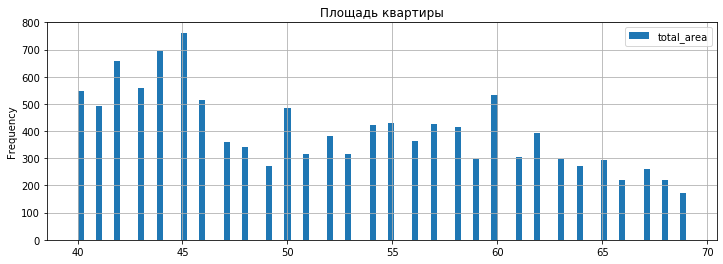

In [126]:
data.plot(y = 'total_area', title = 'Площадь квартиры', kind = 'hist', bins = 100, grid=True, figsize = (12, 4), range = (Q1, Q3))
plt.show()

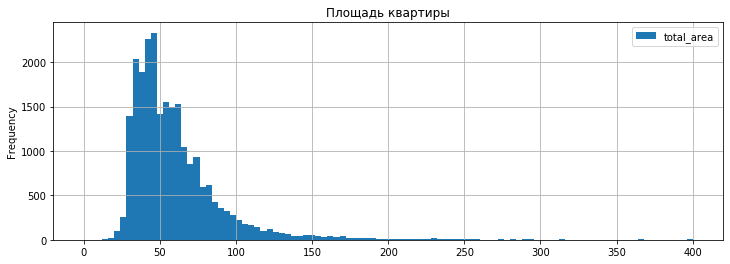

In [127]:
data.plot(y = 'total_area', title = 'Площадь квартиры', kind = 'hist', bins = 100, grid=True, figsize = (12, 4), range = (0, 400))
plt.show()

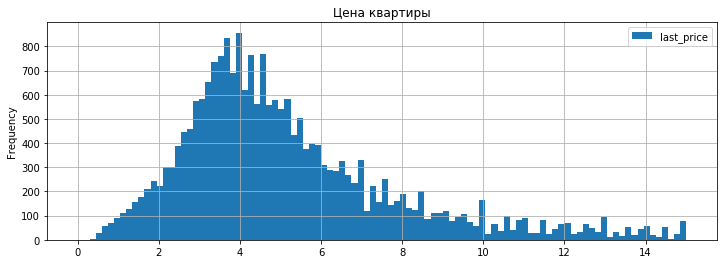

In [128]:
data.plot(y = 'last_price', title = 'Цена квартиры', kind = 'hist', bins = 100, grid=True, range = (0, 15), figsize = (12, 4))
plt.show()

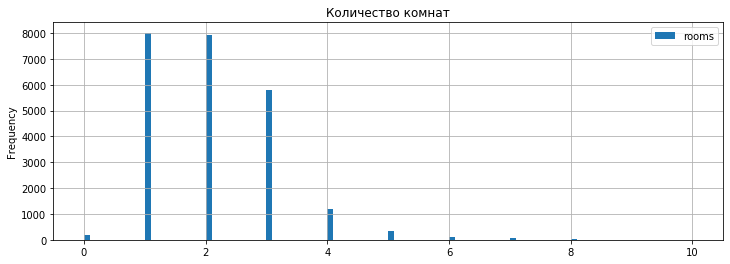

In [129]:
data.plot(y = 'rooms', title = 'Количество комнат', kind = 'hist', bins = 100, grid=True, range = (0, 10), figsize = (12, 4))
plt.show()

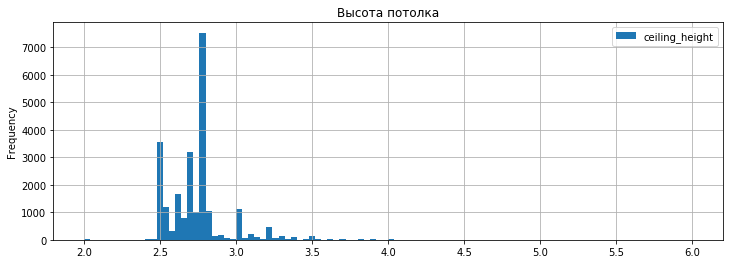

In [130]:
data.plot(y = 'ceiling_height', title = 'Высота потолка', kind = 'hist', bins = 100, grid=True, range = (2, 6), figsize = (12, 4))
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что делаешь графики более объемными.
    
Их так легче изучать.
    
</div>

### Вывод - параметры квартиры


Рынок недвижимости Санкт-Петербурга в сегменте жилой недвижимости представленн широким предложением на любой вкус покупателя, от эконома, где минимальня площадь квартиры составляет- 12(м2), до любителей жить широко, где максимальная площадь квартиры составляет - 900(м2). В целом, среднее предложение по метражу квартиры лежит в интервале 40 - 70(м2)
<br>Более всего предлагают 1,2,3-х комнатные квартиры в интервале цен от 3.4(млн.руб) до 6.8(млн.руб)
<br>Высота потолков квартир в большей своей части является стандартной для массовой застройки, где пики приходятся на 2.5(м), 2.7 -2.8(м). Квартиры с высотой полков от 3(м) и выше, приходятся на сегмент элитного жилья и дореволюционной постройки. 
<br>Присутствуют артефакты ввиде квартиры с ценою 12190(руб) и квартира с потолком от 1м до 100м. Такие данные, при необходимости будут отсекаться. 
<br>Квартиры с с количеством комнат = 0, являются студио-квартирами, потому в таких значениях ничего странного нет. 

### Продажи квартир

In [131]:
god_days_exposition_pt = data.pivot_table(index = ['god_exposition'], values = "days_exposition", aggfunc = ('mean', 'count', 'median'))
god_days_exposition_pt.columns = ['mean', 'count', 'median']
god_days_exposition_pt

,mean,count,median
god_exposition,,,
2014,137.0,803.773723,764.0
2015,1184.0,614.826858,550.0
2016,2763.0,316.464712,225.0
2017,8163.0,156.991792,97.0
2018,8487.0,94.324025,78.0
2019,2871.0,70.832114,95.0


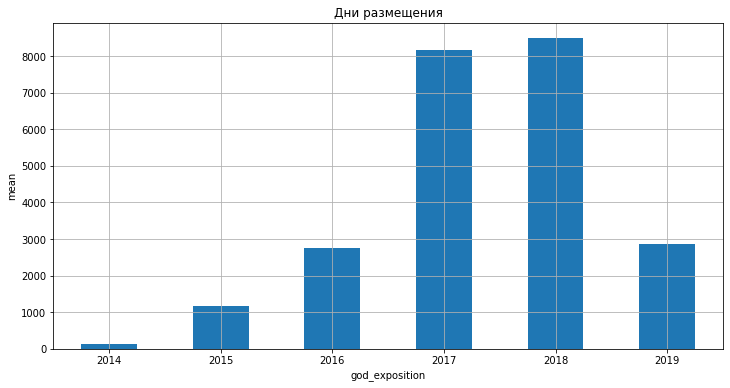

In [132]:
god_days_exposition_pt['mean'].plot.bar(grid=True, figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Дни размещения')
plt.xlabel('god_exposition')
plt.ylabel('mean')
plt.show()

In [133]:
data['days_exposition'].describe()

count    23605.000000
mean       169.365601
std        206.515132
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [134]:
#import matplotlib.pyplot as plt

(0, 1600)

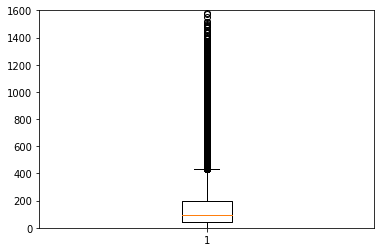

In [135]:
plt.boxplot(data['days_exposition'])
plt.ylim(0, 1600)

(0, 500)

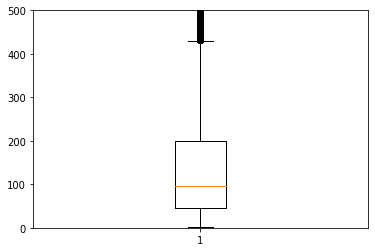

In [136]:
plt.boxplot(data['days_exposition'])
plt.ylim(0, 500)

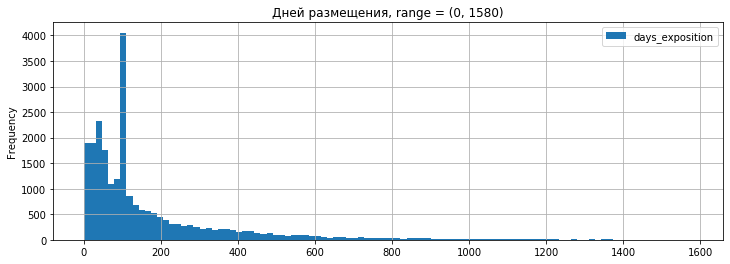

In [137]:
data.plot(y = 'days_exposition', title = 'Дней размещения, range = (0, 1580)', kind = 'hist', bins = 100, grid=True, range = (0, 1580), figsize = (12, 4))
plt.show()

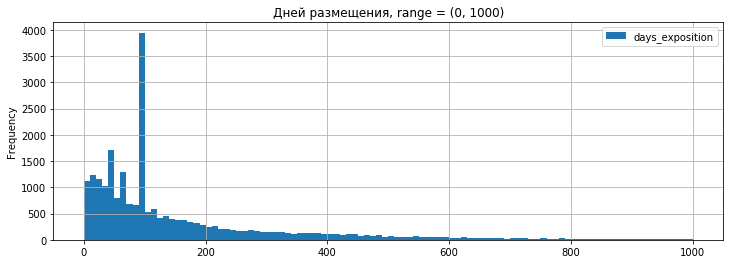

In [138]:
data.plot(y = 'days_exposition', title = 'Дней размещения, range = (0, 1000)', kind = 'hist', bins = 100, grid=True, range = (0, 1000), figsize = (12, 4))
plt.show()

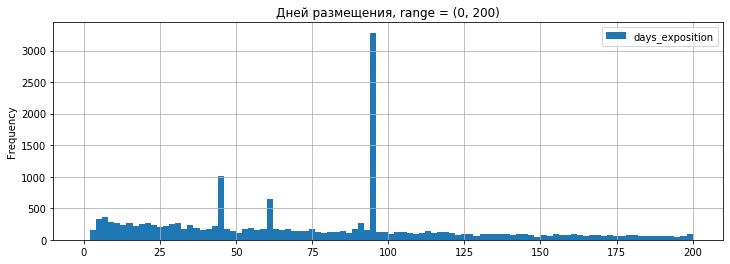

In [139]:
data.plot(y = 'days_exposition', title = 'Дней размещения, range = (0, 200)', kind = 'hist', bins = 100, grid=True, range = (0, 200), figsize = (12, 4))
plt.show()

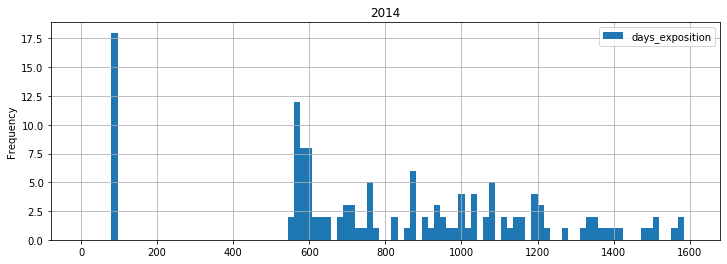

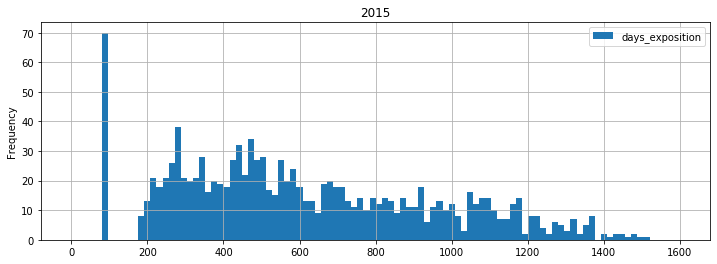

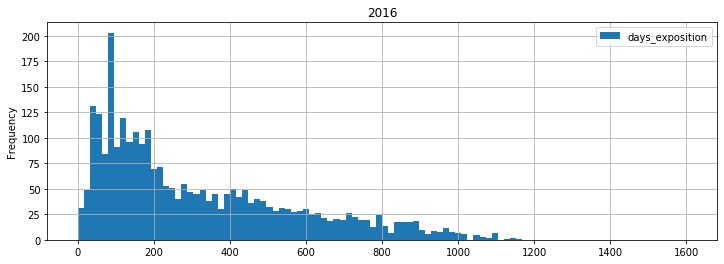

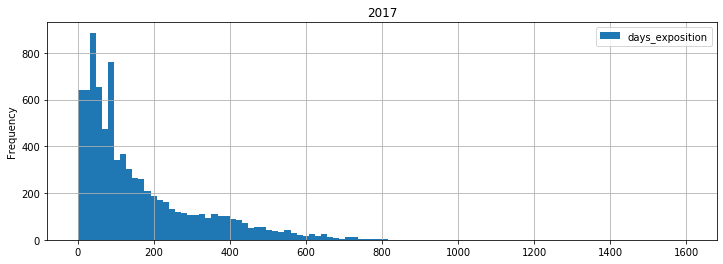

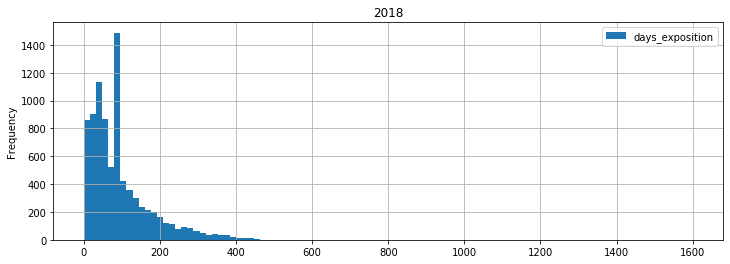

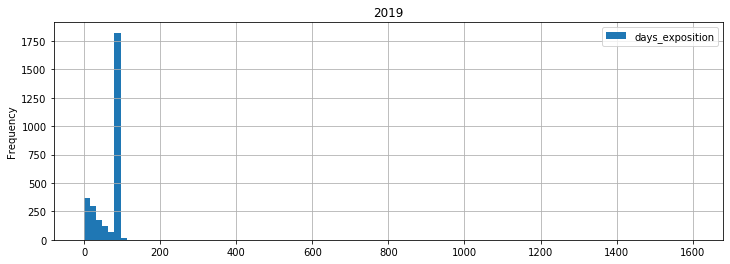

In [140]:
for name, group_data in data.groupby('god_exposition'):
    group_data.plot(y='days_exposition', title=name, kind='hist', bins=100, grid=True, range = (0, 1600), figsize = (12, 4))

### Вывод - продажи квартир

Здесь необходимо отметить следующе: Количество дней размещения не равно продажам, это с одной стороны, сдругой стороны, всякая инвестиция есть факт купли-продажи, то есть, когды ты продаёшь квартитру, ты инвестируешь в денежные купюры, когда - не продаёшь, продолжаешь держать свой актив в недвижимости, что равнозначно гипотетической продажи квартиры самому себе, минуя этапа с денежными купюрами.
<br>Но есть и третья сторона, когда тебя принуждают снять объявление о продаже, например условиями размещения объявлений. Пики снятий объявлений на 45 день, 55 и 95 день размещения, скорее всего связано именно с условиями размещения объявлений.
<br>С 2014 года по 2018 год наблюдается снижение сроков дней размещение с 764 до 78 и увеличение количества продаваемых (или снимаемых с продаж - как угодно) квартир с 137 до 8487 . Что связано, на мой взгляд, со снижением ключевой ставки ЦБ РФ и с предоставлением льгот по ипотеке. 
<br>В 2019 году непонятное и необъяснимое снижение продаж и снятий объявлений - на 95 день.
<br>График с усами или диаграмма размаха показывает, что выбросы присутствуют в верхней части усов. Исходя из графика с усами, доверительный интервал можно принять равным 1 - 450.

### Борьба с артефактами

Как я указывал выше, в таблице прсутствуют артефакты в высоте потолка, в стоимости квартиры, есть выбросы в днях размещения - пики на 45 и 95, площади квартиры. Количество комнат фильтровать не буду, частично само отфильтруется с площадью квартиры. Нету общепринятой методики по определению доверительного интервала. В этом случае, я буду частично полагаться на расчетные данные, а частично - по целесообразности. 

Удалю выбросы в столбце ceiling_height - высота потолка.  

(0, 4)

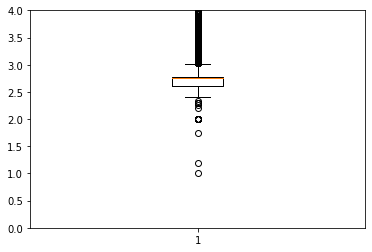

In [141]:
plt.boxplot(data['ceiling_height'])
plt.ylim(0, 4)

Согласно бочке с усами, доверительный интервал находится в пределах 2.4 - 3(м), но я увеличу этот интервал до 3.5, что согласуется с гистограммой(приведена выше), что позволит отобразить квартиры в таблице с дореволюционной постройки. Выведу отфильтрованный спиписок в новую таблицу:

In [142]:
filtr_ceiling_height = data[(data.ceiling_height > 2.4) & (data.ceiling_height < 3.5)]

Теперь таблицу отфильтрую ещё раз и удалю пики на 45 и 95 в днях размещения и задам верхнюю доверительную границу равной 450. 

In [143]:
filtr_ch_days_exposition = filtr_ceiling_height[(~(filtr_ceiling_height.days_exposition == 45)) 
                                               & (~(filtr_ceiling_height.days_exposition == 95))
                                               & (filtr_ceiling_height.days_exposition < 450) 
                                               ]

(0, 15)

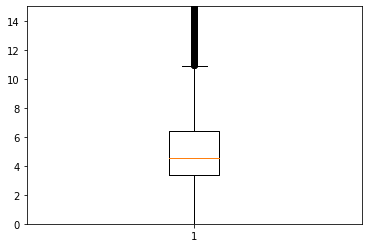

In [144]:
plt.boxplot(filtr_ch_days_exposition['last_price'])
plt.ylim(0, 15)

Отфильтрую таблицу filtr_ch_days_exposition и удалаю выбросы в стоимости квартиры согласно графику усов в интервале 3.4 - 6.8

In [145]:
filtr_ch_dex = filtr_ch_days_exposition[(filtr_ch_days_exposition['last_price'] > 3.4) & (filtr_ch_days_exposition['last_price'] < 6.8)]

Отфильтрую таблицу filtr_ch_dex ещё раз и удалю значения площади квартир согласно графика усов в интервале 12 - 120 (м)

(0, 200)

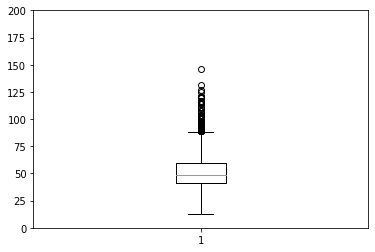

In [146]:
plt.boxplot(filtr_ch_dex['total_area'])
plt.ylim(0, 200)

In [147]:
dt_filtr = dt_filtr = filtr_ch_dex[filtr_ch_dex['total_area'] < 120]

In [148]:
dt_filtr[['days_exposition', 'last_price', 'total_area', 'ceiling_height']].describe()

,days_exposition,last_price,total_area,ceiling_height
count,9058.000000,9058.000000,9058.000000,9058.000000
mean,117.641312,4.763725,51.172555,2.693391
std,108.425112,0.905426,13.748290,0.139518
min,1.000000,3.405000,13.000000,2.450000
25%,34.000000,4.000000,41.000000,2.600000
50%,79.000000,4.600000,49.000000,2.700000
75%,171.000000,5.450000,60.000000,2.770000
max,449.000000,6.799000,119.000000,3.490000


Снова выведы гистограммы по всем столбцам для сравнения

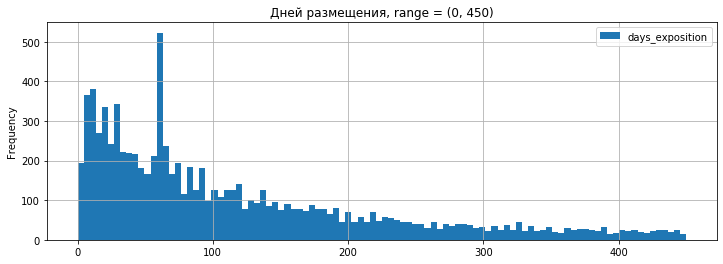

In [149]:
dt_filtr.plot(y = 'days_exposition', title = 'Дней размещения, range = (0, 450)', kind = 'hist', bins = 100, grid=True, range = (0, 450), figsize = (12, 4))
plt.show()

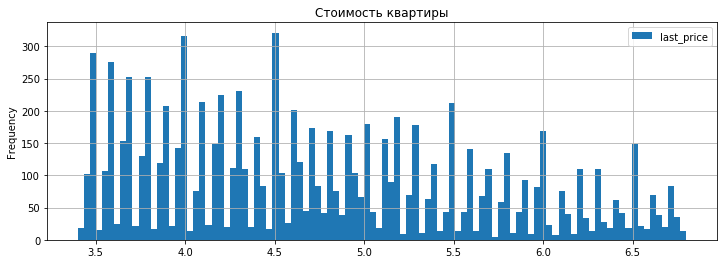

In [150]:
dt_filtr.plot(y = 'last_price', title = 'Стоимость квартиры', kind = 'hist', bins = 100, grid=True, range = (3.4, 6.8), figsize = (12, 4))
plt.show()

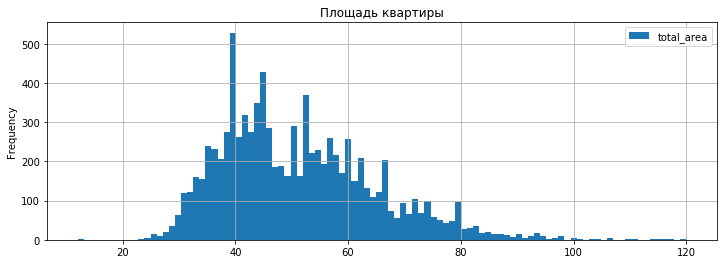

In [151]:
dt_filtr.plot(y = 'total_area', title = 'Площадь квартиры', kind = 'hist', bins = 100, grid=True, range = (12, 120), figsize = (12, 4))
plt.show()

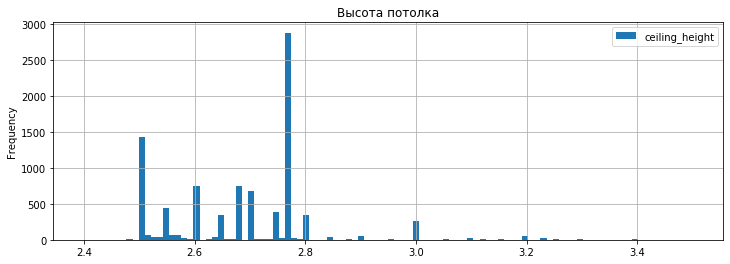

In [152]:
dt_filtr.plot(y = 'ceiling_height', title = 'Высота потолка', kind = 'hist', bins = 100, grid=True, range = (2.4, 3.5), figsize = (12, 4))
plt.show()

(0, 500)

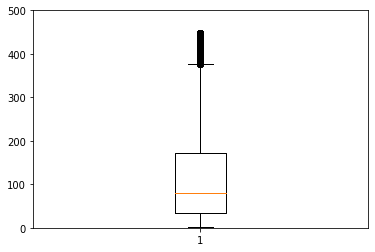

In [153]:
plt.boxplot(dt_filtr['days_exposition'])
plt.ylim(0, 500)

### Вывод - артефакты

Ожидаемо, после удаления артефактов и выбросов, средние слегка сместились, гистограммы стали ровнее, усы графиков покороче, но в целом эти изменения незначительны, отсюда делаю вывод: Распределение Пуассона всесильно, потому что оно верно. 

### Стоимость квартиры. Факторы и зависимости.

#### Зависимость стоимости квадратного метра квартиры от площади квартиры, числа комнат, удалённости от центра:
<br>Будет интересно сравнить общую таблицу data с отфильтрованной dt_filtr

In [154]:
dt_per_meter_zav = data[['total_area', 'rooms', 'cityCenters_nearest', 'per_meter_price']]
filtr_dt_per_meter_zav = dt_filtr[['total_area', 'rooms', 'cityCenters_nearest', 'per_meter_price']]

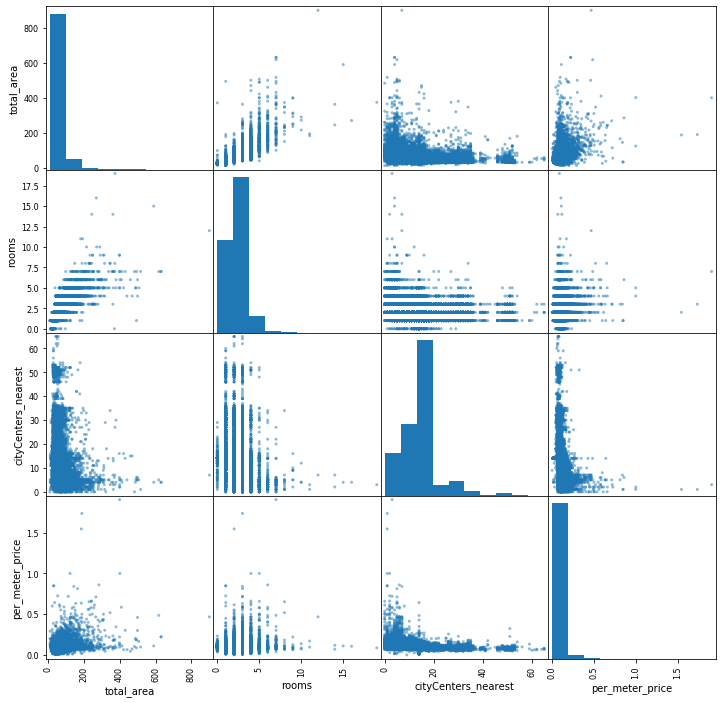

In [155]:
pd.plotting.scatter_matrix(dt_per_meter_zav, figsize=(12, 12)) 
plt.show()

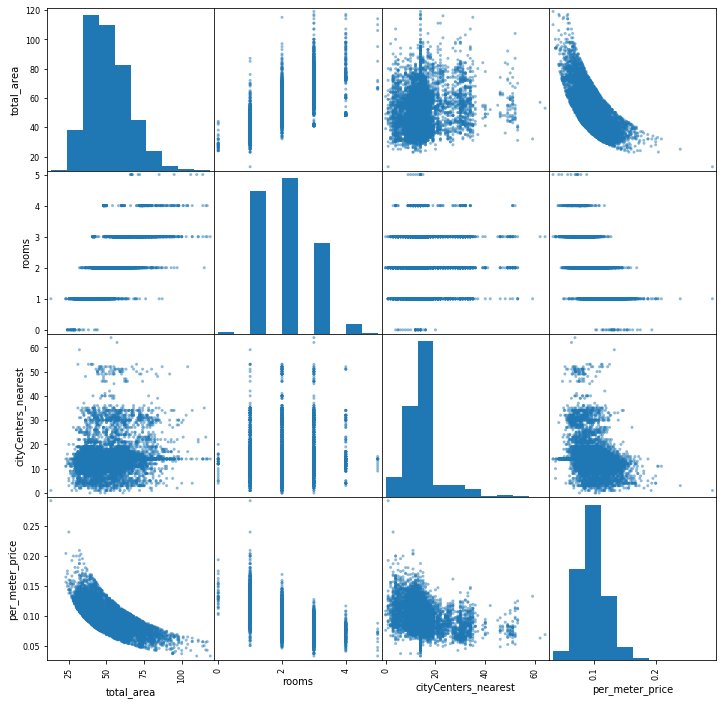

In [156]:
pd.plotting.scatter_matrix(filtr_dt_per_meter_zav, figsize=(12, 12)) 
plt.show()

In [157]:
dt_per_meter_zav.corr()

,total_area,rooms,cityCenters_nearest,per_meter_price
total_area,1.000000,0.758338,-0.222720,0.299227
rooms,0.758338,1.000000,-0.170717,0.052520
cityCenters_nearest,-0.222720,-0.170717,1.000000,-0.283883
per_meter_price,0.299227,0.052520,-0.283883,1.000000


In [158]:
filtr_dt_per_meter_zav.corr()

,total_area,rooms,cityCenters_nearest,per_meter_price
total_area,1.000000,0.786645,0.150667,-0.681047
rooms,0.786645,1.000000,0.096659,-0.633653
cityCenters_nearest,0.150667,0.096659,1.000000,-0.295690
per_meter_price,-0.681047,-0.633653,-0.295690,1.000000


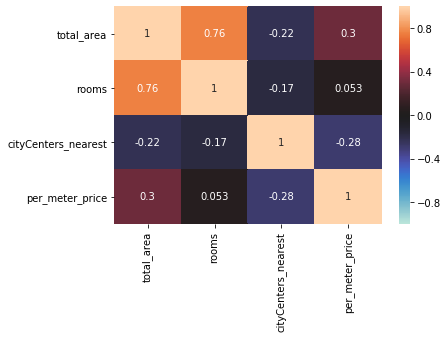

In [159]:
sns.heatmap(dt_per_meter_zav.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0)

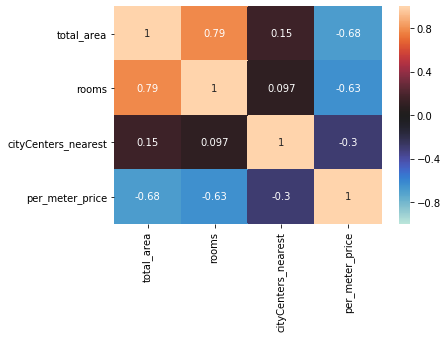

In [160]:
sns.heatmap(filtr_dt_per_meter_zav.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0)

Низкий коэффициент корреляции Пирсона  в первом случае(data) говорит не об отсутствии корреляции, а из-за того,  что взаимосвязь носит более сложный, не линейный характер. Потому коэффициент корреляции такую связь не берёт. Что подтверждается повышенными значениями коэффициента корреляции Пирсона по отфильтрованным значениям dt_filtr, и графики наглядно это демонстрирует.

#### Зависимость стоимости квадратного метра от этажа:

Сравню общую таблицу data с отфильтрованной dt_filtr

In [161]:
floor_category_pt = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'per_meter_price').reset_index()

In [162]:
floor_category_pt

,floor_category,per_meter_price
0,первый,0.082373
1,последний,0.093806


In [163]:
floor_cat_pt_filt = dt_filtr.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'per_meter_price').reset_index()

In [164]:
floor_cat_pt_filt

,floor_category,per_meter_price
0,первый,0.088338
1,последний,0.093073


И data, и dt_filtr, показывают одинаковый результат, последний этаж дороже первого.

#### Зависимость стоимости квадратного метра от даты размещения

Год:

In [165]:
dt_god_exp_pt = data.pivot_table(index='god_exposition', values=['per_meter_price',], aggfunc='mean').reset_index()

In [166]:
dt_god_exp_pt

,god_exposition,per_meter_price
0,2014,0.125314
1,2015,0.104894
2,2016,0.098667
3,2017,0.098039
4,2018,0.098266
5,2019,0.107609


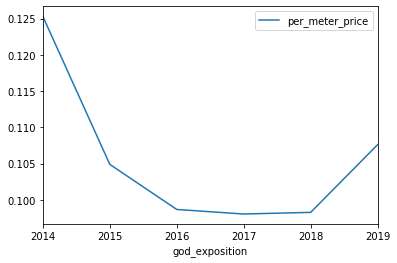

In [167]:
dt_god_exp_pt.plot(y='per_meter_price', x='god_exposition')
plt.show()

Месяц:

In [168]:
dt_mesyc_exp_pt = data.pivot_table(index='mesyc_exposition', values=['per_meter_price',], aggfunc='mean').reset_index()
dt_mesyc_exp_pt

,mesyc_exposition,per_meter_price
0,1,0.100221
1,2,0.099190
2,3,0.099418
3,4,0.102455
4,5,0.098934
5,6,0.098192
6,7,0.100125
7,8,0.100527
8,9,0.100937
9,10,0.098343


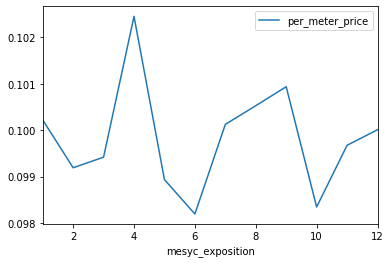

In [169]:
dt_mesyc_exp_pt.plot(y='per_meter_price', x='mesyc_exposition')
plt.show()

День недели:

In [170]:
dt_den_exp_pt = data.pivot_table(index='den_nedeli_exposition', values=['per_meter_price',], aggfunc='mean').reset_index()
dt_den_exp_pt

,den_nedeli_exposition,per_meter_price
0,0,0.099910
1,1,0.100156
2,2,0.100052
3,3,0.100633
4,4,0.099400
5,5,0.099480
6,6,0.098136


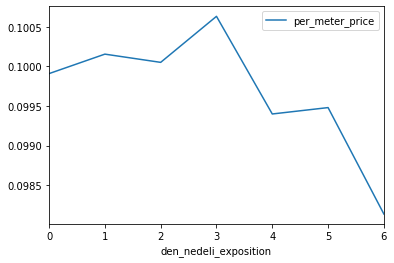

In [171]:
dt_den_exp_pt.plot(y='per_meter_price', x='den_nedeli_exposition')
plt.show()

Самые дорогие квартиры выставлялись в 2014 году - 125314 руб/м2, самые дешёвые в 2017 - 98039 руб/м2.
<br>Наблюдается сезонность в предложении цен на квартиры: весной и осенью повышение, затем - снижение.
<br>Непонятно почему, по четвергам просят больше - 100633 руб/м2, а по воскресеньям меньше - 98136 руб/м2.

#### Населённые пункты

10 населённых пунктов с наибольшим числом объявлений:

In [172]:
top_locality_name = data.pivot_table(index = 'locality_name', values = 'per_meter_price', aggfunc=['count', 'mean'])
top_locality_name.columns = ['count', 'mean']
top_10 = top_locality_name.sort_values('count', ascending = False).head(10)
top_10

,count,mean
locality_name,,
Санкт-Петербург,15680,0.115354
Мурино,586,0.086678
Кудрово,470,0.095815
Шушары,439,0.078943
Всеволожск,398,0.068985
Пушкин,369,0.103611
Колпино,338,0.075736
Парголово,327,0.090676
Гатчина,307,0.069046


Населённые пункты с максимальной и минимальной ценой за квадратный метр:

In [173]:
top_10_maxmin = top_10[(top_10['mean']==top_10['mean'].max()) | (top_10['mean']==top_10['mean'].min())]
top_10_maxmin

,count,mean
locality_name,,
Санкт-Петербург,15680,0.115354
Выборг,237,0.058296


#### Санкт-Петербург. Зонирование. 

In [174]:
sp_data = data.query('locality_name == "Санкт-Петербург"')
sp_data_pt = sp_data.pivot_table(index = 'cityCenters_nearest', values = 'per_meter_price', aggfunc = 'mean').reset_index()
sp_data_pt

,cityCenters_nearest,per_meter_price
0,0,0.187717
1,1,0.166806
2,2,0.147017
3,3,0.129892
4,4,0.137520
5,5,0.147330
6,6,0.152775
7,7,0.141885
8,8,0.120855
9,9,0.110549


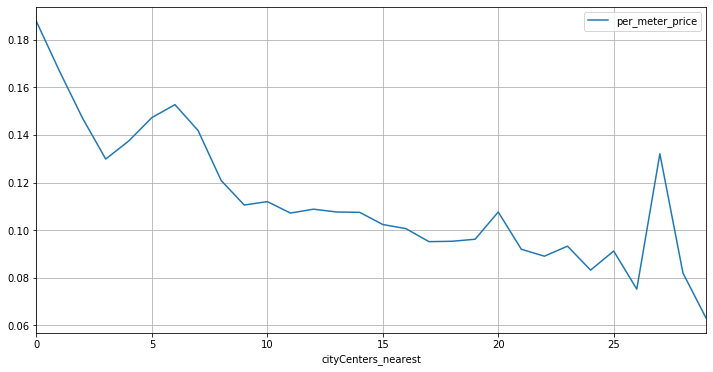

In [175]:
sp_data_pt.plot(y='per_meter_price', x='cityCenters_nearest', figsize=(12, 6), grid=True)
plt.show()

График показывает два излома 3км и 6км, за которыми располагается так называемый "серый" пояс Питера. Условно, к центру можно отнести историческую часть Санкт-Петербурга, очерченную радиусом в 3 км.

#### Санкт-Петербург. Центр. 

##### Проанализирую центр Питера по следующим параметрам: площадь, цена, число комнат, высота потолков и сравню с общей таблицей по Питеру. 

In [176]:
sp_data_centr = data.query('do_centra_cat == "центр"')


In [177]:
sp_data_centr_part = sp_data_centr[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()
sp_data_centr_part

,total_area,last_price,rooms,ceiling_height
count,635.000000,635.000000,635.000000,635.000000
mean,102.127559,18.170583,3.176378,3.232803
std,59.672141,30.292157,1.515558,0.338091
min,12.000000,2.100000,0.000000,2.500000
25%,65.000000,7.595000,2.000000,3.050000
50%,87.000000,10.200000,3.000000,3.230000
75%,120.000000,15.850000,4.000000,3.330000
max,517.000000,401.300000,14.000000,5.800000


In [178]:
sp_data_part = sp_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()
sp_data_part

,total_area,last_price,rooms,ceiling_height
count,15680.000000,15680.000000,15680.000000,15680.000000
mean,64.530804,8.064854,2.173151,2.793936
std,40.423207,13.025833,1.148263,1.042538
min,12.000000,0.012000,0.000000,1.000000
25%,42.000000,4.200000,1.000000,2.600000
50%,55.000000,5.500000,2.000000,2.770000
75%,74.000000,8.162500,3.000000,2.770000
max,900.000000,763.000000,19.000000,100.000000


##### Зависимость стоимости квадратного метра от числа комнат

In [179]:
room_caty_pt_center = sp_data_centr.pivot_table(index = 'rooms', values = 'per_meter_price').reset_index()
room_caty_pt_center

,rooms,per_meter_price
0,0,0.128624
1,1,0.199360
2,2,0.162838
3,3,0.151306
4,4,0.159644
5,5,0.164187
6,6,0.143227
7,7,0.142804
8,8,0.101702
9,9,0.220000


In [180]:
room_caty_pt_gorod = dt_filtr.pivot_table(index = 'rooms', values = 'per_meter_price').reset_index()

In [181]:
sravnenie = pd.concat([room_caty_pt_center, room_caty_pt_gorod], sort=False, axis=1, keys=['rooms', 'per_meter_price'])

In [182]:
print(sravnenie)

   rooms                 per_meter_price                
   rooms per_meter_price           rooms per_meter_price
0      0        0.128624             0.0        0.137062
1      1        0.199360             1.0        0.113702
2      2        0.162838             2.0        0.093056
3      3        0.151306             3.0        0.079733
4      4        0.159644             4.0        0.073347
5      5        0.164187             5.0        0.063936
6      6        0.143227             NaN             NaN
7      7        0.142804             NaN             NaN
8      8        0.101702             NaN             NaN
9      9        0.220000             NaN             NaN
10    11        0.170103             NaN             NaN
11    14        0.116976             NaN             NaN


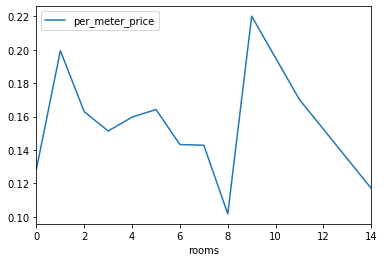

In [183]:
room_caty_pt_center.plot(y='per_meter_price', x='rooms')
plt.show()

График зависимости цены квадратного метра от количества комнат по "городу"

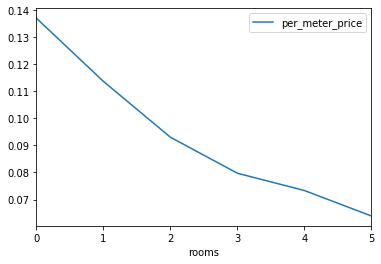

In [184]:
room_caty_pt_gorod.plot(y='per_meter_price', x='rooms')
plt.show()

В отличие от центра прослеживается прямая и линейная зависмость.

##### Зависимость стоимости квадратного метра от этажа

In [185]:
floor_caty_pt_center = sp_data_centr.pivot_table(index = 'floor', values = 'per_meter_price').reset_index()

In [186]:
floor_caty_pt_center

,floor,per_meter_price
0,1,0.130994
1,2,0.157939
2,3,0.144630
3,4,0.159128
4,5,0.172918
5,6,0.255277
6,7,0.324066
7,8,0.547843
8,9,1.000748


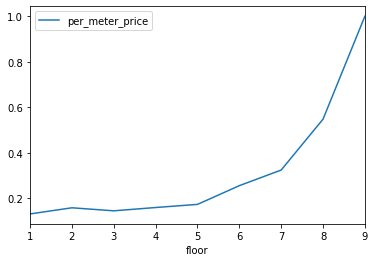

In [187]:
floor_caty_pt_center.plot(y='per_meter_price', x='floor')
plt.show()

##### Зависимость стоимости квадратного метра от удалённости от центра

In [188]:
cityCenters_nearest_caty_pt_center = sp_data_centr.pivot_table(index = 'cityCenters_nearest', values = 'per_meter_price').reset_index()

In [189]:
cityCenters_nearest_caty_pt_center

,cityCenters_nearest,per_meter_price
0,0,0.187717
1,1,0.166806
2,2,0.147017


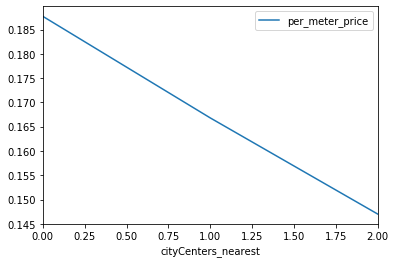

In [190]:
cityCenters_nearest_caty_pt_center.plot(y='per_meter_price', x='cityCenters_nearest')
plt.show()

##### Зависимость стоимости квадратного метра от даты размещения объявления.

In [191]:
god_caty_pt_center = sp_data_centr.pivot_table(index='god_exposition', values=['per_meter_price',], aggfunc='mean').reset_index()

In [192]:
god_caty_pt_center

,god_exposition,per_meter_price
0,2014,0.373924
1,2015,0.157819
2,2016,0.143964
3,2017,0.153338
4,2018,0.154603
5,2019,0.206748


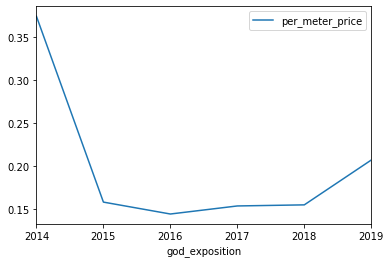

In [193]:
god_caty_pt_center.plot(y='per_meter_price', x='god_exposition')
plt.show()

In [194]:
mesyc_caty_pt_center = sp_data_centr.pivot_table(index='mesyc_exposition', values=['per_meter_price',], aggfunc='mean').reset_index()
mesyc_caty_pt_center

,mesyc_exposition,per_meter_price
0,1,0.155796
1,2,0.151284
2,3,0.165099
3,4,0.206020
4,5,0.136468
5,6,0.144748
6,7,0.148504
7,8,0.167094
8,9,0.148185
9,10,0.162873


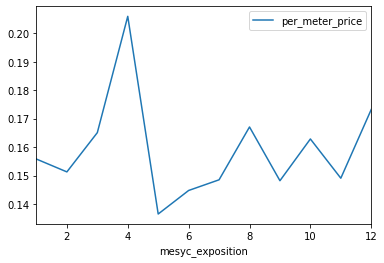

In [195]:
mesyc_caty_pt_center.plot(y='per_meter_price', x='mesyc_exposition')
plt.show()

In [196]:
den_caty_pt_center = sp_data_centr.pivot_table(index='den_nedeli_exposition', values=['per_meter_price',], aggfunc='mean').reset_index()
den_caty_pt_center

,den_nedeli_exposition,per_meter_price
0,0,0.167702
1,1,0.174361
2,2,0.149932
3,3,0.170057
4,4,0.147062
5,5,0.148275
6,6,0.154407


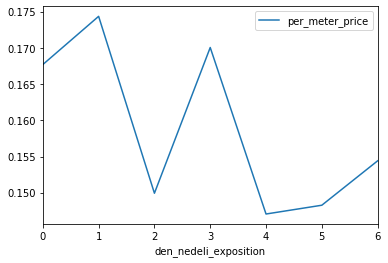

In [197]:
den_caty_pt_center.plot(y='per_meter_price', x='den_nedeli_exposition')
plt.show()

Самые дорогие квартиры выставлялись в 2014 году - 373924 руб/м2, самые дешёвые в 2016 - 143964 руб/м2.
Наблюдаются пики в предложении цен за квадратный метр на квартиры: апрель, август, октябрь, декабрь повышение, затем - снижение.
Непонятно почему, по понедельникам просят больше - 167702 руб/м2, а по пятницам меньше - 147062 руб/м2.

### Вывод - Исследовательский анализ данных

Проведенный анализ данных выявил зависимости или отсутствие таковых от параметров квартиры, параметров объявления. Сравнительный анализ показал, что исторический центр значительно отличается от остальной части Санкт_Петербурга. Чтобы не повторяться все подробности в общем выводе. 

## Общий вывод:

В настоящем проекте проведено исследование рынка недвижимости в г. Санкт-Петербург и соседних районов на основе архива данных сервиса Яндекс.Недвижимость за период с 2014 года по 2019 год.
<br>
Санкт-Петербург сочетает в себе два типа городов: приморский – где зоной притяжения является береговая линия и континентальный – где зоной притяжения является исторический центр. Плюс промышленный пояс, возникший вокруг исторического центра, затем пояс советской застройки, а также островки жилых застроек, дореволюционного и современного периодов. Вот это, своего рода «лоскутное одеяло», порождает трудности в построении математической модели рынка недвижимости Санкт-Петербурга. 
<br>
Задачей проекта является установление параметров, влияющих на рыночную стоимость объектов недвижимости, которые позволят создать автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.
<br>
Шаг 1. Изучена общая информация, полученная из файла данных. Множество артефактов, пропуски, большое разнообразие в наименовании населённых пунктов, единицы измерения, типы данных, требуют проведения серьёзной предобработки данных.
<br>
Шаг 2. Проведена предобработка данных. Определены, изучены и заполнены пропущенные значения. Данные приведены к необходимым типам. 
<br>
Шаг 3. Выполнены необходимые расчёты, результаты добавлены в таблицу, проверка результатов произведена.
<br>
Шаг 4. Исследовательский анализ данных. 
<br>
Проведенный анализ данных показывает, что для более точного построения математической модели требуется провести зонирование по территориальному признаку и исследовать каждую зону отдельно. Тем не менее исследование позволило выявить общие показатели, которые могут быть использованы при создании автоматизированной системы. Разделю их по типу:
1.	Параметры объявления. 
2.	Параметры квартиры
3.	Расположение квартиры
4.	Экология 

<br>
Внутри каждого типа, где это возможно, приведу сравнительные характеристики центра и остальной части города. 


### Общий вывод - Параметры объявления.

Сюда входят следующие показатели: 
<br>days_exposition - сколько дней было размещено объявление (от публикации до снятия),
<br>first_day_exposition — дата публикации.

<br>Показатель days_exposition сильно подвержен экономическому состоянию в стране в общем и в Питере, в частности:
наблюдается увеличение количества объявлений с 2014 год – 137 по 2018 год -  8487.
<br>При этом показатель days_exposition снижался с 764 в 2014 году до 78 в 2018 году. 
<br>В 2019 году наблюдается резкое изменение тенденции на обратную. 

<br>Показатель first_day_exposition, отражает в себе экономическое состояние и носит как сезонный характер, так и субъективное влияние:
<br>С 2014 года по 2017 год цена квадратного метра снижалась (с 125314 р/м2 до 98039 р/м2), в 2018 цена начала повышаться с 98266 р/м2 до 107609 р/м2 в 2019 году. 
<br>Цена квадратного метра подвержена сезонному колебанию: весной –осенью всплеск с максимумами в апреле – 102455 р/м2 и сентябре – 100937 р/м2, и минимумами в июне – 98192 р/м2 и 98343 р/м2 – в октябре. 
<br>Непонятно почему, но по четвергам просят больше - 100633 р/м2, а по воскресеньям меньше - 98136 р/м2.

<br>Центр несколько отличается от остальной части города:
<br>Самые дорогие квартиры выставлялись в 2014 году - 373924 р/м2, самые дешёвые в 2016 - 143964 р/м2. 
<br>Наблюдаются пики в предложении цен за квадратный метр на квартиры: апрель – 206020 р/м2, август – 167094 р/м2, октябрь – 162873 р/м2, декабрь – 173242 р/м2. Минимум приходится на май месяц – 136468 р/м2. 
<br>Опять же, но в центре по понедельникам просят больше - 167702 р/м2, а по пятницам меньше - 147062 р/м2.


### Общий вывод - Параметры квартиры.

Параметров много, но в исследуемую часть входят следующие показатели: 
<br>total_area – площадь квартиры,
<br>rooms – количество комнат,
<br>floor – этаж.

<br>Показатели total_area =0.3 и rooms= 0.05 показывают низкую корреляцию Пирсона с ценю за квадратный метр, что говорит не об отсутствии корреляции, а о том, что взаимосвязь носит более сложный, не линейный характер. И это подтверждается повышенными значениями коэффициента корреляции Пирсона по отфильтрованным значениям где total_area =(-0.68) и rooms=(-0.63) и графики наглядно это демонстрирует. Полученные данные ещё раз говорят в пользу территориального зонирования города. 

<br>Прослежена явная зависимость от этажности: последний этаж всегда дороже на 5-15% первого.

<br>По центру зависимость от этажа линейная, средняя цена квадратного метра прибавляется с каждым этажом, с 130994 р/м2 на первом этаже, до 1000748 р/м2 на 9 этаже. 
<br>По центру, средняя цена квадратного метра не обнаруживает какую-либо линейную зависимость от числа комнат и носит хаотичный характер. Тогда как для остальной части города, каждая дополнительная комната снижает цену квадратного метра с 137062 р/м2 у студио до 63936 р/м2 у 5-ти комнатной квартиры. 


### Общий вывод -  Расположение квартиры.

Входят следующие показатели:
<br>locality_name – наименование населённого пункта  
<br>cityCenters_nearest – расстояние до центра.

<br>Понятно, что самые дорогие квартиры в Санкт-Петербурге, средняя цена за квадратный метр – 115354 руб. Самые дешевые предлагают в Выборге – 58296 р/м2.
<br>Линейная зависимость цены квадратного метра от расстояния до центра наблюдается, но тем не менее и здесь есть свои нюансы, о которых ниже. 
<br>В центре, в среднем за квадратный метр просят – 187717 руб., на 29 километре – 63012 руб.


### Общий вывод – Экология.

40% территории Санкт-Петербурга занимают водоёмы, парки, бульвары и скверы. Потому эти показатели не вносят значительный вклад в цену квадратного метра. Но так называемый, экологически неблагополучный, «ржавый пояс», опоясывающий исторический центр, отражается в цене квадратного метра, значительным снижением в 3 км от центра – 129892 р/м2, против – 187717 р/м2 в центре и 152775 р/м2 на 6 км.
<br>Также наблюдаются незначительные пики на 20 км и 27 км, которые связаны скорее всего с новыми поселениями в экологически чистых районах. 
